In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import math

df_raw = pd.read_excel("port_10.xlsx", header=None, names=["submitted", "time_submitted", "reaction_time1(ms)", "reaction_time2(ms)", "typing_speed(wpm)", "quiz_scores"], skiprows=1)

print(df_raw)

                  submitted time_submitted  reaction_time1(ms)  \
0   2023-11-08 03:54:13 UTC          After                 246   
1   2023-11-07 22:20:50 UTC          After                 355   
2   2023-11-07 22:20:52 UTC          After                 254   
3   2023-11-07 22:18:13 UTC          After                 253   
4   2023-11-07 22:16:20 UTC          After                 307   
5   2023-11-08 00:21:47 UTC          After                 217   
6   2023-11-07 22:16:41 UTC          After                 274   
7   2023-11-07 22:16:05 UTC          After                  74   
8   2023-11-07 22:17:40 UTC          After                 246   
9   2023-11-07 22:17:22 UTC          After                 349   
10  2023-11-07 22:17:05 UTC          After                 236   
11  2023-11-07 22:17:37 UTC          After                 285   
12  2023-11-07 22:19:17 UTC          After                 292   
13  2023-11-07 22:04:19 UTC         Before                 292   
14  2023-1

In [4]:
submit_after_df = df_raw.loc[df_raw["time_submitted"] == "After", ["time_submitted", "typing_speed(wpm)", "reaction_time1(ms)"]]
print(submit_after_df)

   time_submitted  typing_speed(wpm)  reaction_time1(ms)
0           After                 38                 246
1           After                 52                 355
2           After                 31                 254
3           After                 71                 253
4           After                 55                 307
5           After                 65                 217
6           After                 66                 274
7           After                 48                  74
8           After                 54                 246
9           After                 40                 349
10          After                 86                 236
11          After                 63                 285
12          After                 69                 292


In [5]:
submit_before_df = df_raw.loc[df_raw["time_submitted"] == "Before", ["time_submitted", "typing_speed(wpm)", "reaction_time1(ms)"]]
print(submit_before_df)

   time_submitted  typing_speed(wpm)  reaction_time1(ms)
13         Before                 59                 292
14         Before                 72                 273
15         Before                 52                 259
16         Before                 50                 322
17         Before                 91                 307
18         Before                 47                 269
19         Before                 57                 299
20         Before                 65                 431
21         Before                 72                 323
22         Before                 68                 278
23         Before                 80                 263
24         Before                 84                 438


In [6]:
sstdev_after = np.std(submit_after_df['typing_speed(wpm)'], ddof=1)
print(f'The standard error of the "After" sample is {sstdev_after}')
n1=len(submit_after_df)

The standard error of the "After" sample is 15.292448278773884


In [9]:
sstdev_before = np.std(submit_before_df['typing_speed(wpm)'], ddof=1)
print(f'The standard error of the "Before" sample is {sstdev_before}')
n2=len(submit_before_df)

The standard error of the "Before" sample is 14.022438727938441


In [10]:
num = (((sstdev_before**2)/12)+((sstdev_after**2)/13))**2
denom = ((1/11)*((sstdev_before**2)/12)**2)+((1/12)*((sstdev_after**2)/13)**2)
print(num/denom)

22.999768902976427


In [12]:
t_value = sp.stats.t.ppf(1-0.025/2, 23)
print(t_value)

2.3978750646569895


In [13]:
margin_of_error = t_value * math.sqrt(((sstdev_after**2)/n1)+((sstdev_before**2)/n2))
print(margin_of_error)

14.058765060947428


In [14]:
df_raw["typing_speed(wpm)"].describe()

count    25.000000
mean     61.400000
std      15.206906
min      31.000000
25%      52.000000
50%      63.000000
75%      71.000000
max      91.000000
Name: typing_speed(wpm), dtype: float64

In [15]:
high_quiz_score = df_raw.loc[df_raw["quiz_scores"] == "High", ["quiz_scores", "typing_speed(wpm)"]]
print(high_quiz_score)

   quiz_scores  typing_speed(wpm)
6         High                 66
7         High                 48
10        High                 86
11        High                 63
12        High                 69
17        High                 91
18        High                 47
19        High                 57
20        High                 65
21        High                 72
22        High                 68
23        High                 80
24        High                 84


In [16]:
low_quiz_score = df_raw.loc[df_raw["quiz_scores"] == "Low", ["quiz_scores", "typing_speed(wpm)"]]
print(low_quiz_score)

   quiz_scores  typing_speed(wpm)
0          Low                 38
1          Low                 52
2          Low                 31
3          Low                 71
4          Low                 55
5          Low                 65
8          Low                 54
9          Low                 40
13         Low                 59
14         Low                 72
15         Low                 52
16         Low                 50


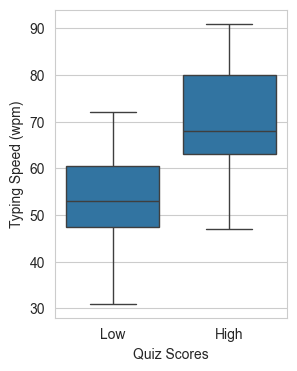

In [17]:
plt.figure(figsize=(3,4))
sns.boxplot(x='quiz_scores', y='typing_speed(wpm)', data=df_raw)
plt.xlabel('Quiz Scores')
plt.ylabel('Typing Speed (wpm)')
plt.show()

In [20]:
t_stat1, p_value1 = sp.stats.ttest_ind(high_quiz_score['typing_speed(wpm)'], low_quiz_score['typing_speed(wpm)'], equal_var=False)
print(sp.stats.ttest_ind(high_quiz_score['typing_speed(wpm)'], low_quiz_score['typing_speed(wpm)'], equal_var=False))
print(p_value1)

TtestResult(statistic=2.972549658348873, pvalue=0.006815126843891094, df=22.99992983500092)
0.006815126843891094


In [25]:
print(sp.stats.ttest_ind(submit_before_df['typing_speed(wpm)'], submit_after_df['typing_speed(wpm)'], equal_var=False))

t_stat2, p_value2 = sp.stats.ttest_ind(submit_before_df['typing_speed(wpm)'], submit_after_df['typing_speed(wpm)'], equal_var=False)

print(f"The p-value result for this t-test is {p_value2}")

TtestResult(statistic=1.6454749671148794, pvalue=0.11347102776652881, df=22.999768902976427)
The p-value result for this t-test is 0.11347102776652881


In [26]:
df_raw["reaction_time1(ms)"].describe()

count     25.000000
mean     285.680000
std       69.548376
min       74.000000
25%      254.000000
50%      278.000000
75%      307.000000
max      438.000000
Name: reaction_time1(ms), dtype: float64

In [27]:
df_raw["reaction_time2(ms)"].describe()

count     25.000000
mean     266.720000
std       36.170338
min      188.000000
25%      243.000000
50%      271.000000
75%      300.000000
max      315.000000
Name: reaction_time2(ms), dtype: float64

Text(0, 0.5, 'reaction time (ms)')

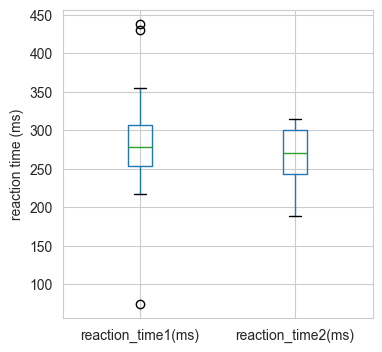

In [28]:
df_raw.boxplot(column=['reaction_time1(ms)', 'reaction_time2(ms)'],figsize=(4,4))
plt.ylabel('reaction time (ms)')

In [29]:
dfreedom = 25-1
t_value2 = sp.stats.t.ppf(1-0.025/2, dfreedom)
print(t_value2)

2.390949315129389


In [30]:
margin_of_error2 = t_value2 * math.sqrt((((df_raw["reaction_time1(ms)"].describe()['std'])**2)/(df_raw["reaction_time1(ms)"].describe()['count'])) + ((df_raw["reaction_time2(ms)"].describe()['std'])**2)/(df_raw["reaction_time2(ms)"].describe()['count']))
print(margin_of_error2)

37.486150967270916


In [31]:
x1_x2 = abs(df_raw["reaction_time1(ms)"].describe()['mean'] - df_raw["reaction_time2(ms)"].describe()['mean'])

print(f'The interval estimate for the difference between the two reaction tests is from {x1_x2 - margin_of_error2:.3f} to {x1_x2 + margin_of_error2:.3f}')

The interval estimate for the difference between the two reaction tests is from -18.526 to 56.446


In [32]:
print(sp.stats.ttest_ind(submit_after_df['reaction_time1(ms)'], submit_before_df['reaction_time1(ms)'],
                                       equal_var=False))

t_stat3, p_value3 = sp.stats.ttest_ind(submit_after_df['reaction_time1(ms)'], submit_before_df['reaction_time1(ms)'],
                                       equal_var=False)
print(p_value3)

TtestResult(statistic=-1.9989756761387047, pvalue=0.05760010414830939, df=22.92926310134507)
0.05760010414830939


In [33]:
print(sp.stats.ttest_rel(df_raw["reaction_time1(ms)"], df_raw["reaction_time2(ms)"], alternative="greater"))
t_stat4, p_value4 = sp.stats.ttest_rel(df_raw["reaction_time1(ms)"], df_raw["reaction_time2(ms)"], alternative="greater")
print(p_value4)

TtestResult(statistic=1.8740009217701972, pvalue=0.03657781085925922, df=24)
0.03657781085925922
